```
  /$$$$$$  /$$   /$$ /$$$$$$$   /$$$$$$ 
 /$$__  $$| $$  | $$| $$__  $$ /$$__  $$
| $$  \__/| $$  | $$| $$  \ $$| $$  \ $$
|  $$$$$$ | $$  | $$| $$  | $$| $$  | $$
 \____  $$| $$  | $$| $$  | $$| $$  | $$
 /$$  \ $$| $$  | $$| $$  | $$| $$  | $$
|  $$$$$$/|  $$$$$$/| $$$$$$$/|  $$$$$$/
 \______/  \______/ |_______/  \______/ 


 @Author : Pierre Lague

 @Email : p.lague@sudogroup.fr

 @Date : 04/10/2024

```

# Azure Cloud Billing Exploration

In [201]:
import warnings
warnings.filterwarnings('ignore')

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time
import datetime
import shap

In [203]:
azure_bill = pd.read_csv(r"C:\Users\Pierre LAGUE\Documents\SUDO\scripts\CLOUD_PROVIDER_BILL\data\azure_sample_10000.csv")

In [204]:
num_df = azure_bill["Quantity"]

In [205]:
def convert_to_datetime(df, label):
    # Convert date strings to datetime
    df.loc[df.index, label] = (pd.to_datetime(df[label], format='%m/%d/%Y'))
    df[f'timestamp_{label}'] = df[label].apply(lambda x: x.timestamp())
    df = df.drop(columns=[label])

    return df

azure_bill = convert_to_datetime(azure_bill, "_Date")
azure_bill = convert_to_datetime(azure_bill, "BillingPeriodStartDate")
azure_bill = convert_to_datetime(azure_bill, "BillingPeriodEndDate")

numeric = azure_bill.select_dtypes(include=[np.number, np.float32])
categoric = azure_bill.select_dtypes(exclude=[np.number, np.float32], include=[np.bool_, np.object_])
numeric = numeric[["Quantity", "Cost", "timestamp__Date", "timestamp_BillingPeriodStartDate"]]

In [206]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_extraction.text import CountVectorizer


In [207]:
azure_bill

BillingAccountId BillingAccountName  BillingProfileId  \
0                    3  BILLING ACCOUNT 1                 3   
1                    3  BILLING ACCOUNT 1                 3   
2                    3  BILLING ACCOUNT 1                 3   
3                    1  BILLING ACCOUNT 2                 1   
4                    1  BILLING ACCOUNT 2                 1   
...                ...                ...               ...   
9995                 1  BILLING ACCOUNT 2                 1   
9996                 1  BILLING ACCOUNT 2                 1   
9997                 1  BILLING ACCOUNT 2                 1   
9998                 1  BILLING ACCOUNT 2                 1   
9999                 1  BILLING ACCOUNT 2                 1   

     BillingProfileName    AccountOwnerId       AccountName  \
0     BILLING ACCOUNT 1   2@clientorg.com   ACCOUNT OWNER 2   
1     BILLING ACCOUNT 1   2@clientorg.com   ACCOUNT OWNER 2   
2     BILLING ACCOUNT 1  26@clientorg.com  ACCOUNT OWNER 26   
3     BILLING ACCOUNT 2  41@clientorg.com  ACCOUNT OWNER 41   
4     BILLING ACCOUNT 2  24@clientorg.com  ACCOUNT OWNER 24   
...                 ...               ...               ...   
9995  BILLING ACCOUNT 2  20@clientorg.com  ACCOUNT OWNER 20   
9996  BILLING ACCOUNT 2  14@clientorg.com  ACCOUNT OWNER 14   
9997  BILLING ACCOUNT 2  20@clientorg.com  ACCOUNT OWNER 20   
9998  BILLING ACCOUNT 2  20@clientorg.com  ACCOUNT OWNER 20   
9999  BILLING ACCOUNT 2  43@clientorg.com  ACCOUNT OWNER 43   

                            SubscriptionId  SubscriptionName  \
0     af9eabfc-8485-42fc-ac74-489abcf63da3  SUBSCRIPTION 539   
1     af9eabfc-8485-42fc-ac74-489abcf63da3  SUBSCRIPTION 539   
2     bb012ad2-c593-43c6-ab7d-0cf38384ae65  SUBSCRIPTION 580   
3     85e6a067-d98a-4139-87ce-16a0b0415b0f  SUBSCRIPTION 407   
4     dee9e324-35ce-42e1-9ed4-a30c27855f29  SUBSCRIPTION 699   
...                                    ...               ...   
9995  096f1337-f61a-4117-a22a-6538059d36b7   SUBSCRIPTION 29   
9996  4730e78e-f536-4305-bbcb-b8111eb3a6e6  SUBSCRIPTION 205   
9997  096f1337-f61a-4117-a22a-6538059d36b7   SUBSCRIPTION 29   
9998  096f1337-f61a-4117-a22a-6538059d36b7   SUBSCRIPTION 29   
9999  74d84202-a37a-492e-8cce-7cf9af8601ac  SUBSCRIPTION 358   

                                                Product PartNumber  ...  \
0     Virtual Machines FS Series - F4s Spot Hours - ...  AAD-87440  ...   
1     Virtual Machines Dv2/DSv2 Series - DS12 v2 Spo...  AAD-87438  ...   
2     Virtual Machines Dv3/DSv3 Series - D16 v3/D16s...  AAA-45146  ...   
3              Files v2 - Hot LRS - Metadata - UK South  AAD-61843  ...   
4     Virtual Machines Dadsv5 Series - D2ads v5 - US...  AAL-50303  ...   
...                                                 ...        ...  ...   
9995  Bandwidth Inter-Region - Inter Continent Data ...  AAD-84502  ...   
9996  Bandwidth Inter-Region - Inter Continent Data ...  AAD-84502  ...   
9997  Bandwidth Inter-Region - Inter Continent Data ...  AAD-84502  ...   
9998  Bandwidth Inter-Region - Inter Continent Data ...  AAD-84502  ...   
9999  Bandwidth Inter-Region - Inter Continent Data ...  AAD-84502  ...   

     PayGPrice PricingModel CostAllocationRuleName  \
0     0.026109         Spot                    NaN   
1     0.049036         Spot                    NaN   
2     0.768000     OnDemand                    NaN   
3     0.025600     OnDemand                    NaN   
4     0.000000  Reservation                    NaN   
...        ...          ...                    ...   
9995  0.046800     OnDemand                    NaN   
9996  0.046800     OnDemand                    NaN   
9997  0.046800     OnDemand                    NaN   
9998  0.046800     OnDemand                    NaN   
9999  0.046800     OnDemand                    NaN   

                                              benefitId   benefitName  \
0                                                   NaN     BENEFIT 1   
1                          

In [208]:
word_word_numeric_cols = ["BillingAccountName", "BillingProfileName", "AccountOwnerId", "AccountName", "SubscriptionName", "InvoiceSection", "CostCenter", "ReservationName"]
sum_ascii = categoric.drop(columns=word_word_numeric_cols)

In [209]:
azure_bill = azure_bill.loc[azure_bill["MeterCategory"]=="Virtual Machines"]
numeric = azure_bill[["Quantity", "Cost", "timestamp__Date", "timestamp_BillingPeriodStartDate"]]

In [210]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')

def hex_fct(label):
    if pd.isnull(label):
        return 0
    else:
        return int(label.replace("-", ""), 16)

def hash_fct(df, label):
    df[label] = df[label].apply(lambda x:hash(x))
    return df

def spacy_fct(col):
    if pd.isnull(col):
        return 0
    else:
        col = np.mean(nlp(col).vector)
        return col

hex_col = ["SubscriptionId","ProductOrderId"]
hash_col = ["MeterRegion", "BillingCurrency", "ResourceLocation", "ConsumedService", "ServiceInfo2", "UnitOfMeasure", "ProductOrderName", "OfferId", "IsAzureCreditEligible", "PublisherName", "ChargeType", "Frequency", "PublisherType", "PricingModel", "SubscriptionEnv", "ResourceGroupEnv"]
spacy_col = ["Product", "PartNumber", "MeterCategory", "MeterSubCategory", "MeterName", "ResourceId", "ResourceName", "AdditionalInfo", "PlanName", "benefitId", "benefitName"]
numerical_cols = ["Quantity", "Cost"]
hex_df = azure_bill[hex_col]
hash_df = azure_bill[hash_col]
spacy_df = azure_bill[spacy_col]
num_df = azure_bill[numerical_cols]


Quantity      Cost
0     0.316673  0.009500
1     0.316673  0.015834
2     3.758470  2.251324
4     1.000000  0.000000
5     0.633346  0.076002
...        ...       ...
7289  9.000000  0.720000
7290  0.450009  0.036001
7291  0.233338  0.018667
7292  0.233338  0.023334
7293  0.333340  0.033334

[2990 rows x 2 columns]

In [211]:
for col in hex_df.columns:
    hex_df[col] = hex_df[col].apply(lambda x: hex_fct(x))

In [212]:
hex_df

SubscriptionId  \
0     233438770464561083321349930346675060131   
1     233438770464561083321349930346675060131   
2     248571696068901863519964206278319058533   
4     296303027208135878142317302479858261801   
5     110139760086538303254733605427770902867   
...                                       ...   
7289  110139760086538303254733605427770902867   
7290  110139760086538303254733605427770902867   
7291  110139760086538303254733605427770902867   
7292  110139760086538303254733605427770902867   
7293  233438770464561083321349930346675060131   

                               ProductOrderId  
0                                           0  
1                                           0  
2                                           0  
4     174324767409293244356901593976509127200  
5                                           0  
...                                       ...  
7289                                        0  
7290                                        0  
7291                                        0  
7292                                        0  
7293                                        0  

[2990 rows x 2 columns]

In [168]:
for col in hash_df.columns:
    hash_df[col] = hash_df[col].apply(lambda x:hash(x))

In [169]:
hash_df

MeterRegion      BillingCurrency     ResourceLocation  \
0    -6730047543340641508 -1767266639117795670 -8025029163497410892   
1    -6730047543340641508 -1767266639117795670 -8025029163497410892   
2    -6730047543340641508 -1767266639117795670   902346306867539396   
4    -6730047543340641508  -246733746335928150 -8025029163497410892   
5    -6730047543340641508 -1767266639117795670 -8025029163497410892   
...                   ...                  ...                  ...   
7289 -6730047543340641508 -1767266639117795670 -8025029163497410892   
7290 -6730047543340641508 -1767266639117795670 -8025029163497410892   
7291 -6730047543340641508 -1767266639117795670 -8025029163497410892   
7292 -6730047543340641508 -1767266639117795670 -8025029163497410892   
7293 -6730047543340641508 -1767266639117795670 -8025029163497410892   

          ConsumedService         ServiceInfo2        UnitOfMeasure  \
0     1155593508747700270 -7552328174365661960  1133354434387109551   
1     1155593508747700270 -7552328174365661960  1133354434387109551   
2     1155593508747700270         134851629401  1133354434387109551   
4     1155593508747700270 -2584561953726660024  1133354434387109551   
5     1155593508747700270 -7552328174365661960  1133354434387109551   
...                   ...                  ...                  ...   
7289  1155593508747700270 -7552328174365661960  1133354434387109551   
7290  1155593508747700270 -7552328174365661960  1133354434387109551   
7291  1155593508747700270 -7552328174365661960  1133354434387109551   
7292  1155593508747700270 -7552328174365661960  1133354434387109551   
7293  1155593508747700270 -7552328174365661960  1133354434387109551   

         ProductOrderName              OfferId  IsAzureCreditEligible  \
0            134851629401 -4450891849269492146                      1   
1            134851629401 -4450891849269492146                      1   
2            134851629401 -4450891849269492146                      1   
4     6390065826639640229 -4450891849269492146                      1   
5            134851629401 -4450891849269492146                      1   
...                   ...                  ...                    ...   
7289         134851629401 -4450891849269492146                      1   
7290         134851629401 -4450891849269492146                      1   
7291         134851629401 -4450891849269492146                      1   
7292         134851629401 -4450891849269492146                      1   
7293         134851629401 -4450891849269492146                      1   

            PublisherName           ChargeType            Frequency  \
0     5128051501921693468  8027307754891874108 -1584140853091932610   
1     5128051501921693468  8027307754891874108 -1584140853091932610   
2     5128051501921693468  8027307754891874108 -1584140853091932610   
4            134851629401  8027307754891874108 -1584140853091932610   
5     5128051501921693468  8027307754891874108 -1584140853091932610   
...                   ...                  ...                  ...   
7289  5128051501921693468  8027307754891874108 -1584140853091932610   
7290  5128051501921693468  8027307754891874108 -1584140853091932610   
7291  5128051501921693468  8027307754891874108 -1584140853091932610   
7292  5128051501921693468  8027307754891874108 -1584140853091932610   
7293  5128051501921693468  8027307754891874108 -1584140853091932610   

            PublisherType         PricingModel      SubscriptionEnv  \
0     2753330122428892582 -2078539406540125827 -4883829040884176970   
1     2753330122428892582 -2078539406540125827 -4883829040884176970   
2     2753330122428892582  6301547220059461349 -4883829040884176970   
4     2753330122428892582  1419301668895005418 -5418219328976340931   
5     2753330122428892582 -2078539406540125827 -4883829040884176970   
...                   ...                  ...                  ...   
7289  2753330122428892582 -2078539406540125827 -4883829040884176970   
7290  2753

In [170]:
for col in spacy_df.columns:
    spacy_df[col] = spacy_df[col].apply(lambda x: spacy_fct(x))

KeyboardInterrupt: 

In [123]:
spacy_df

Product  PartNumber  MeterCategory  MeterSubCategory  MeterName  \
0    -0.007945    0.028242      -0.016757         -0.021721  -0.024603   
1    -0.007855    0.054033      -0.016757         -0.017220  -0.030940   
2     0.011360    0.031727      -0.016757          0.020526   0.014932   
4     0.002779    0.039378      -0.016757         -0.010266   0.016171   
5    -0.005780   -0.001000      -0.016757         -0.009618  -0.028894   
...        ...         ...            ...               ...        ...   
7289  0.002847    0.024964      -0.016757         -0.011741   0.006162   
7290  0.002847    0.024964      -0.016757         -0.011741   0.006162   
7291  0.002847    0.024964      -0.016757         -0.011741   0.006162   
7292  0.002847    0.024964      -0.016757         -0.011741   0.006162   
7293  0.002847    0.024964      -0.016757         -0.011741   0.006162   

      ResourceId  ResourceName  AdditionalInfo  PlanName  benefitId  \
0       0.047374      0.019076        0.033171  0.013224   0.000000   
1       0.048070      0.024715        0.039515 -0.019530   0.000000   
2       0.044956      0.048575        0.035676 -0.014481   0.000000   
4       0.045024      0.018206        0.044773  0.000000   0.045032   
5       0.041224      0.033397        0.038371 -0.016086   0.000000   
...          ...           ...             ...       ...        ...   
7289    0.041162      0.019766        0.034304  0.007149   0.000000   
7290    0.042303      0.015049        0.030212  0.007149   0.000000   
7291    0.041290      0.005281        0.035946  0.007149   0.000000   
7292    0.040476      0.033298        0.035946  0.007149   0.000000   
7293    0.045353      0.034503        0.048015  0.007149   0.000000   

      benefitName  
0       -0.009079  
1       -0.009079  
2       -0.009079  
4       -0.007797  
5       -0.009079  
...           ...  
7289    -0.009079  
7290    -0.009079  
7291    -0.009079  
7292    -0.009079  
7293    -0.009079  

[2990 rows x 11 columns]

In [ ]:
df_all = pd.concat([hex_df, hash_df, spacy_df])

In [1]:
df_all

NameError: name 'df_all' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_all.corr(method='spearman')

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

top_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print(top_corr[top_corr != 1].head(20))  # Exclude self-correlations and show top 20

In [208]:
import pandas as pd
import numpy as np

# Install the spaCy model
!python -m spacy download en_core_web_sm

# Load the spaCy model

def transform_resource_name(resource_name):
    if pd.isnull(resource_name):
        return 0
    else:
        vector = nlp(resource_name).vector
        return np.mean(vector)

# Assuming azure_bill is your DataFrame
cols = [""]
sum_ascii['RessourceCode'] = sum_ascii['ResourceName'].apply(transform_resource_name)

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ----------------------------- ---------- 9.4/12.8 MB 48.8 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 40.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [209]:
sum_ascii["RessourceCode"]

0       0.019076
1       0.024715
2       0.048575
3       0.011621
4       0.018206
          ...   
9995    0.029008
9996    0.040538
9997    0.024345
9998    0.052202
9999    0.039974
Name: RessourceCode, Length: 10000, dtype: float64

In [146]:
for col in sum_ascii.columns:
    if type(sum_ascii[col]) != bool:
        sum_ascii[col] = sum_ascii[col].apply(lambda x : sum(ord(char) for char in x))

TypeError: 'float' object is not iterable

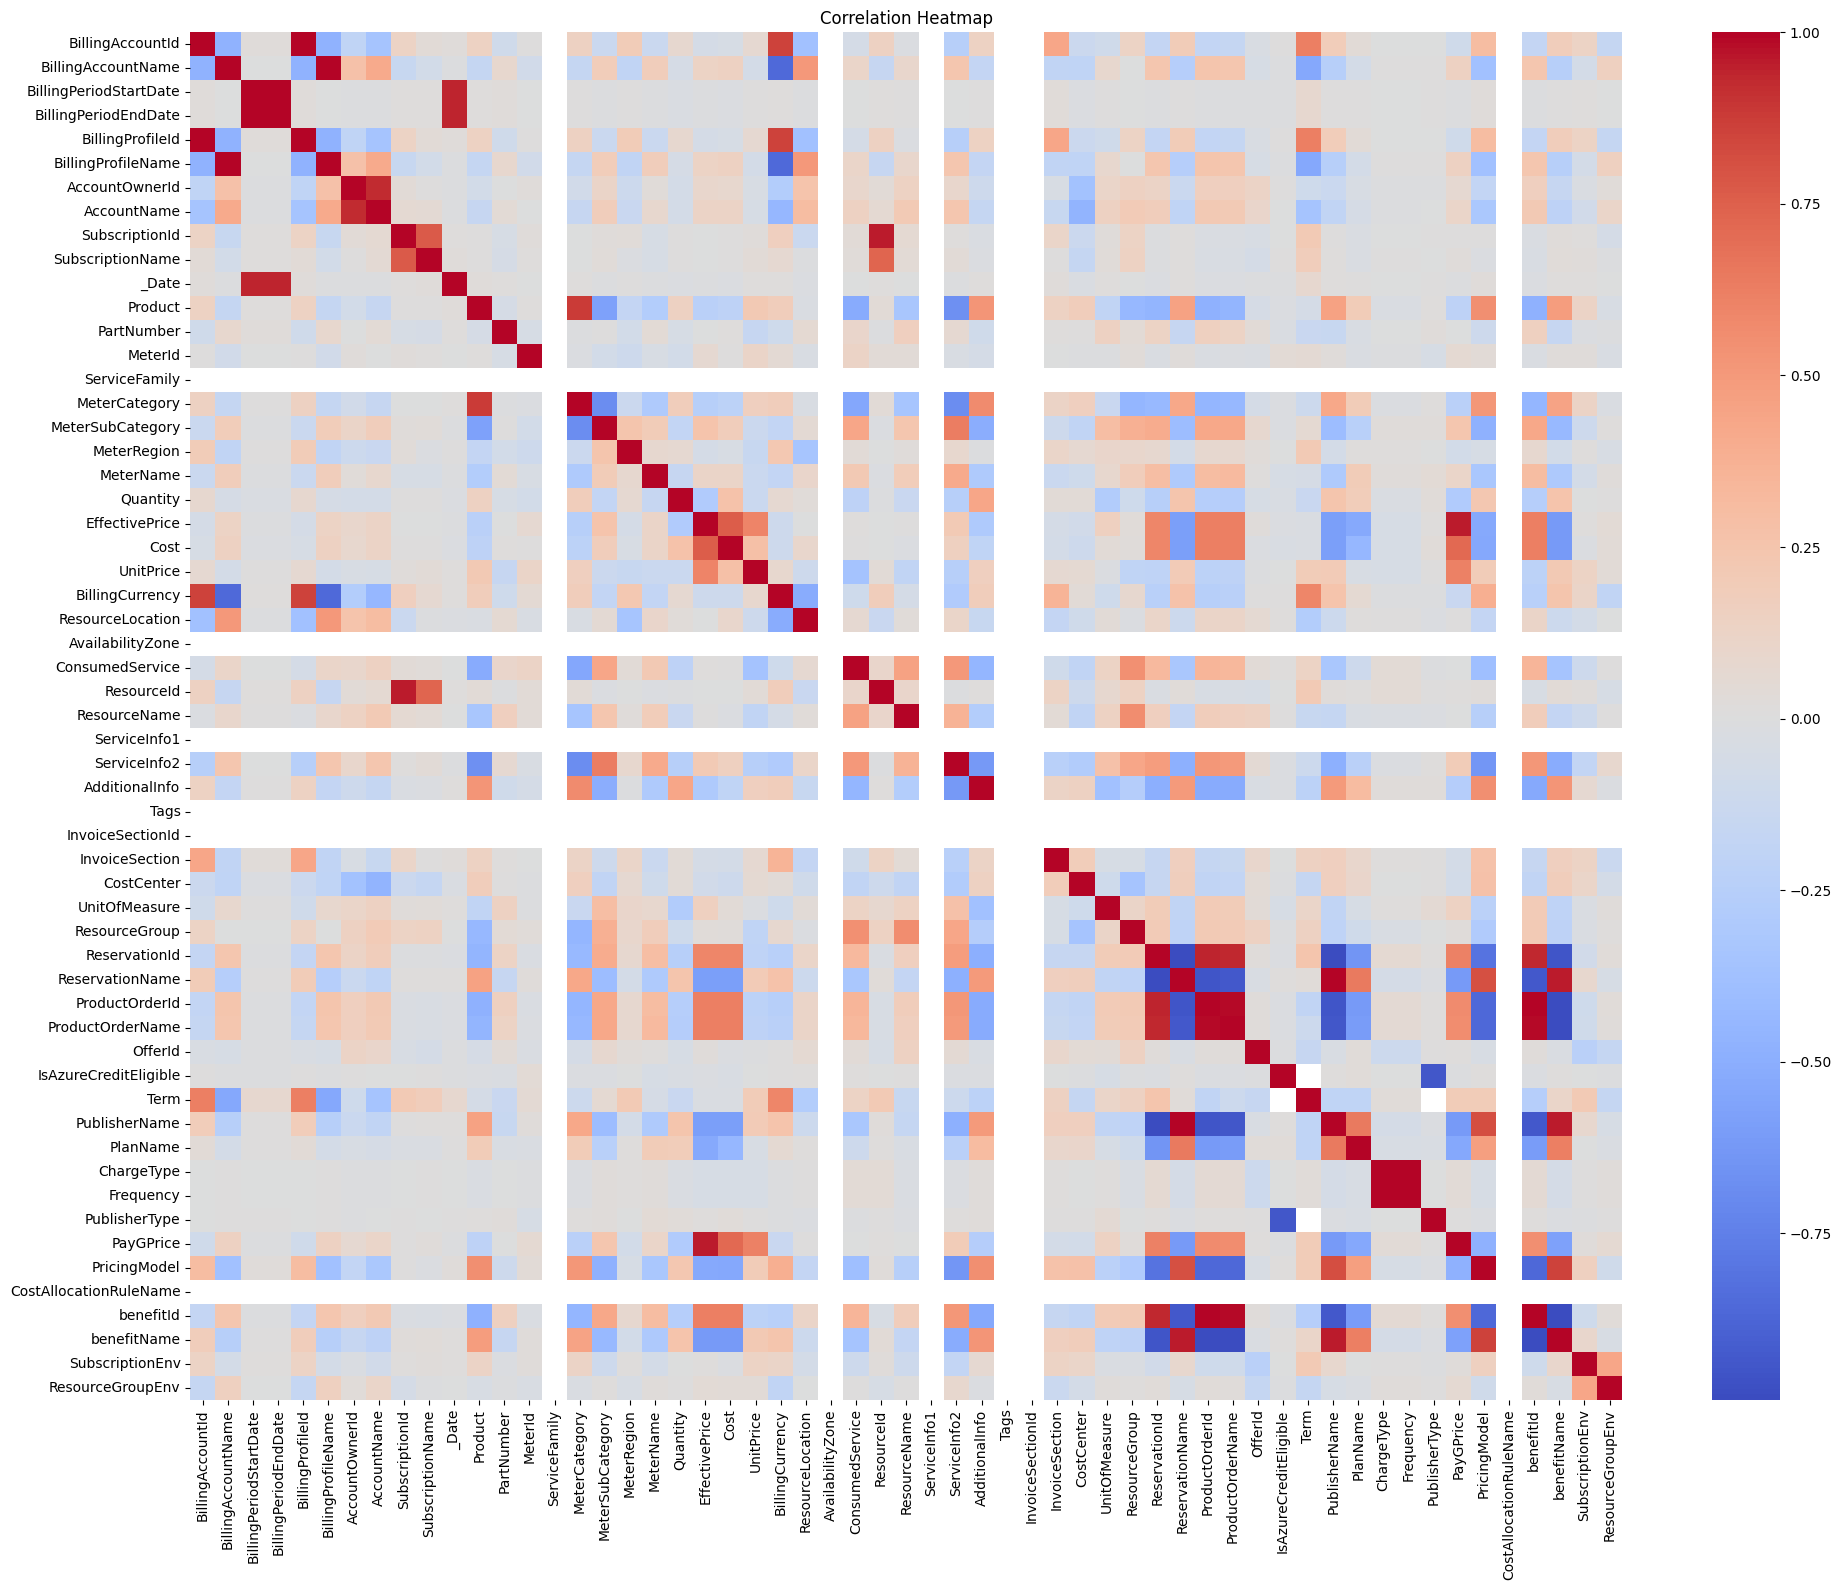

benefitId         ProductOrderId          0.998496
ReservationName   PublisherName           0.992528
benefitId         ProductOrderName        0.988557
ProductOrderName  ProductOrderId          0.986321
EffectivePrice    PayGPrice               0.958404
PublisherName     benefitName             0.956353
SubscriptionId    ResourceId              0.956283
ReservationName   benefitName             0.953802
ProductOrderId    ReservationId           0.945403
_Date             BillingPeriodEndDate    0.942716
ReservationId     ProductOrderName        0.935141
                  benefitId               0.931381
AccountName       AccountOwnerId          0.928081
MeterCategory     Product                 0.880558
benefitName       PricingModel            0.859564
BillingCurrency   BillingProfileId        0.858622
PublisherName     PricingModel            0.815599
PricingModel      ReservationName         0.812744
SubscriptionName  SubscriptionId          0.769967
EffectivePrice    Cost         

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

numeric_columns = azure_bill.select_dtypes(include=[np.number]).columns
categorical_columns = azure_bill.select_dtypes(exclude=[np.number]).columns

le = LabelEncoder()
df_encoded = azure_bill.copy()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(azure_bill[col].astype(str))

corr_matrix = df_encoded.corr(method='spearman')

plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

top_corr = corr_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print(top_corr[top_corr != 1].head(20))  # Exclude self-correlations and show top 20

-> vectorize the string columns
-> drop the numerical columns


In [171]:
azure_bill = azure_bill[["MeterName", "MeterCategory", "InvoiceSection", "MeterSubCategory", "ResourceLocation", "Quantity", "EffectivePrice", "UnitPrice", "Cost", "AdditionalInfo", "UnitOfMeasure", "ProductOrderName", "PlanName", "PayGPrice", "SubscriptionEnv", "ResourceGroupEnv"]]

In [172]:
azure_bill["MeterCategory"]

0       Virtual Machines
1       Virtual Machines
2       Virtual Machines
4       Virtual Machines
5       Virtual Machines
              ...       
7289    Virtual Machines
7290    Virtual Machines
7291    Virtual Machines
7292    Virtual Machines
7293    Virtual Machines
Name: MeterCategory, Length: 2990, dtype: object

In [173]:
import pandas as pd
import json

def get_cpus(dict_str):
    try:
        return json.loads(str(dict_str)).get("VCPUs")
    except json.JSONDecodeError:
        return None
    
def get_CQ(dict_str):
    try:
        return json.loads(str(dict_str)).get("ConsumedQuantity")
    except json.JSONDecodeError:
        return None

def add_performance_columns(df):
    df["AdditionalInfo"].astype("str")
    # Create a copy of the DataFrame to ensure we're not working on a slice
    df_copy = df.copy()
    
    # Add the new column
    df_copy['ConsumedQty'] = df_copy['AdditionalInfo'].apply(get_CQ)
    df_copy['VCPUs'] = df_copy['AdditionalInfo'].apply(get_cpus)
    
    return df_copy

# Usage
azure_bill = add_performance_columns(azure_bill)

In [174]:
azure_bill = azure_bill.loc[azure_bill['MeterCategory']=='Virtual Machines']
qty_vs_csm_qty = azure_bill[["MeterSubCategory", "Quantity", "ConsumedQty"]]
qty_vs_csm_qty = qty_vs_csm_qty.loc[(qty_vs_csm_qty.Quantity != qty_vs_csm_qty.ConsumedQty)]

In [175]:
azure_bill["MeterName"].value_counts()

MeterName
D4 v3/D4s v3      185
D4s v5            152
D2 v3/D2s v3      149
D4 v2/DS4 v2      147
D2s v5            139
                 ... 
E4-2ds v4           1
E32 v3/E32s v3      1
B1s                 1
D4d v4              1
E32ds v4            1
Name: count, Length: 165, dtype: int64

In [176]:
azure_bill["VCPUs"].value_counts()

VCPUs
4     1145
8      704
2      638
16     388
32      40
1       32
4        9
36       7
48       5
64       4
20       3
12       2
1        1
2        1
Name: count, dtype: int64

### Exploration & more processing

In [181]:
azure_bill.dtypes

MeterName            object
MeterCategory        object
InvoiceSection       object
MeterSubCategory     object
ResourceLocation     object
Quantity            float64
EffectivePrice      float64
UnitPrice           float64
Cost                float64
AdditionalInfo       object
UnitOfMeasure        object
ProductOrderName     object
PlanName             object
PayGPrice           float64
SubscriptionEnv      object
ResourceGroupEnv     object
ConsumedQty         float64
VCPUs                object
dtype: object

In [198]:
df = azure_bill

In [199]:
df = df[df["VCPUs"].map(lambda x: isinstance(x,int))]
df["VCPUs"].value_counts()
df

MeterName     MeterCategory InvoiceSection MeterSubCategory  \
0                F4s Spot  Virtual Machines     SECTION 60     FS Series VM   
1            DS12 v2 Spot  Virtual Machines     SECTION 60   DSv2 Series VM   
2          D16 v3/D16s v3  Virtual Machines     SECTION 50  Dv3/DSv3 Series   
4                D2ads v5  Virtual Machines     SECTION 59    Dadsv5 Series   
5            E16d v4 Spot  Virtual Machines     SECTION 60   Edv4 Series VM   
...                   ...               ...            ...              ...   
7289  D13 v2/DS13 v2 Spot  Virtual Machines     SECTION 60    Dv2 Series VM   
7290  D13 v2/DS13 v2 Spot  Virtual Machines     SECTION 60    Dv2 Series VM   
7291  D13 v2/DS13 v2 Spot  Virtual Machines     SECTION 60    Dv2 Series VM   
7292  D13 v2/DS13 v2 Spot  Virtual Machines     SECTION 60    Dv2 Series VM   
7293  D13 v2/DS13 v2 Spot  Virtual Machines     SECTION 60    Dv2 Series VM   

     ResourceLocation  Quantity  EffectivePrice  UnitPrice      Cost  \
0             EastUS2  0.316673           0.030     0.0300  0.009500   
1             EastUS2  0.316673           0.050     0.0500  0.015834   
2              EastUS  3.758470           0.599     0.5990  2.251324   
4             EastUS2  1.000000           0.000     0.0752  0.000000   
5             EastUS2  0.633346           0.120     0.1200  0.076002   
...               ...       ...             ...        ...       ...   
7289          EastUS2  9.000000           0.080     0.0800  0.720000   
7290          EastUS2  0.450009           0.080     0.0800  0.036001   
7291          EastUS2  0.233338           0.080     0.0800  0.018667   
7292          EastUS2  0.233338           0.100     0.1000  0.023334   
7293          EastUS2  0.333340           0.100     0.1000  0.033334   

                                         AdditionalInfo UnitOfMeasure  \
0     {"UsageType":"ComputeHR","ImageType":"Canonica...        1 Hour   
1     {"UsageType":"ComputeHR","ImageType":"Canonica...        1 Hour   
2     {"UsageType":"ComputeHR","ImageType":null,"Ser...        1 Hour   
4     {"UsageType":"ComputeHR","ImageType":"Windows ...        1 Hour   
5     {"UsageType":"ComputeHR","ImageType":"Canonica...        1 Hour   
...                                                 ...           ...   
7289  {"UsageType":"ComputeHR","ImageType":"Canonica...        1 Hour   
7290  {"UsageType":"ComputeHR","ImageType":"Canonica...        1 Hour   
7291  {"UsageType":"ComputeHR","ImageType":"Canonica...        1 Hour   
7292  {"UsageType":"ComputeHR","ImageType":"Canonica...        1 Hour   
7293  {"UsageType":"ComputeHR","ImageType":"Canonica...        1 Hour   

                                       ProductOrderName PlanName  PayGPrice  \
0                                                   NaN      F4s   0.026109   
1                                                   NaN  DS12 v2   0.049036   
2                                                   NaN   D16 v3   0.768000   
4     Reserved VM Instance, Standard_D4ads_v5, US Ea...      NaN   0.000000   
5                                                   NaN  E16d v4   0.115200   
...                                                 ...      ...        ...   
7289                                                NaN   D13 v2   0.078458   
7290                                                NaN   D13 v2   0.078458   
7291                                                NaN   D13 v2   0.078458   
7292                                                NaN   D13 v2   0.098072   
7293                                                NaN   D13 v2   0.098072   

     SubscriptionEnv ResourceGroupEnv  ConsumedQty VCPUs  
0                prd              NaN     0.316673     4  
1                prd              NaN     0.316673     4  
2                prd              prd     1.000000    16  
4                dev              dev     1.000000     2  
5                prd              NaN     0.633346    16  
...              ...  

In [191]:
df.dtypes

MeterName            object
MeterCategory        object
InvoiceSection       object
MeterSubCategory     object
ResourceLocation     object
Quantity            float64
EffectivePrice      float64
UnitPrice           float64
Cost                float64
AdditionalInfo       object
UnitOfMeasure        object
ProductOrderName     object
PlanName             object
PayGPrice           float64
SubscriptionEnv      object
ResourceGroupEnv     object
ConsumedQty         float64
VCPUs                 int64
dtype: object

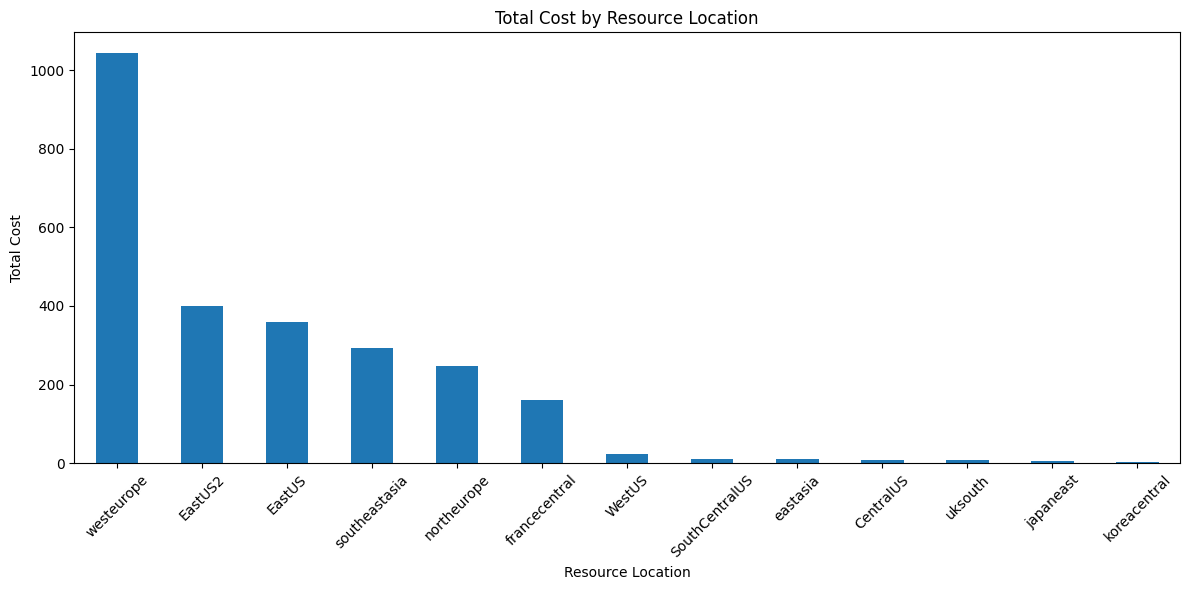

In [41]:
# Geographical Analysis
location_cost = df.groupby('ResourceLocation')['Cost'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
location_cost.plot(kind='bar')
plt.title('Total Cost by Resource Location')
plt.xlabel('Resource Location')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

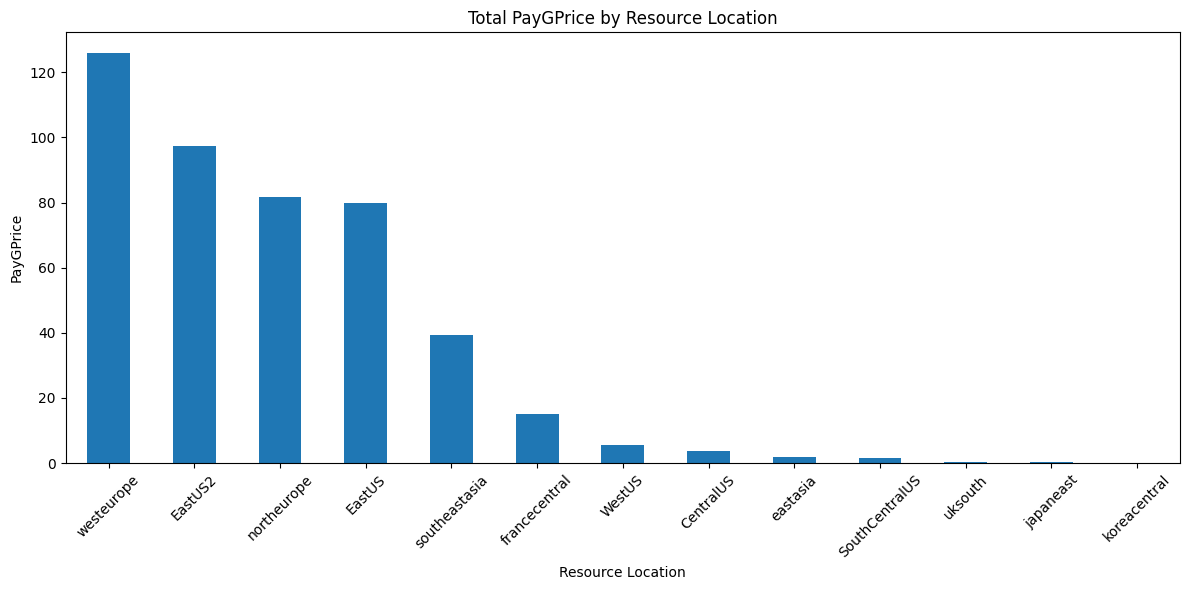

In [42]:
# Geographical Analysis
location_cost = df.groupby('ResourceLocation')['PayGPrice'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
location_cost.plot(kind='bar')
plt.title('Total PayGPrice by Resource Location')
plt.xlabel('Resource Location')
plt.ylabel('PayGPrice')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

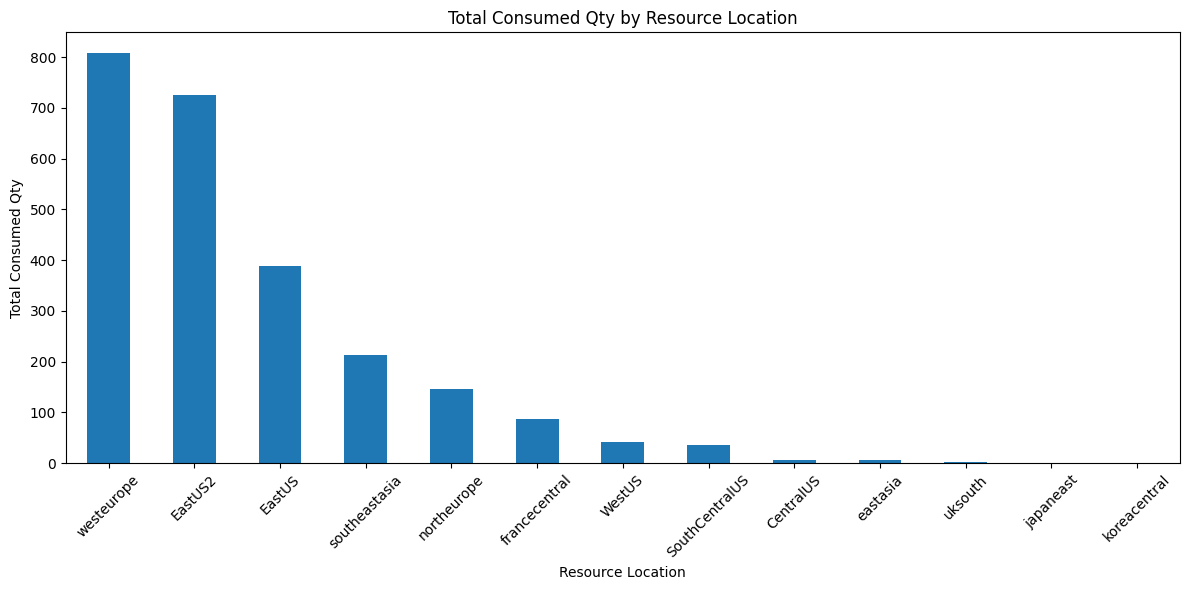

In [43]:
# Geographical Analysis
location_cost = df.groupby('ResourceLocation')['ConsumedQty'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
location_cost.plot(kind='bar')
plt.title('Total Consumed Qty by Resource Location')
plt.xlabel('Resource Location')
plt.ylabel('Total Consumed Qty')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

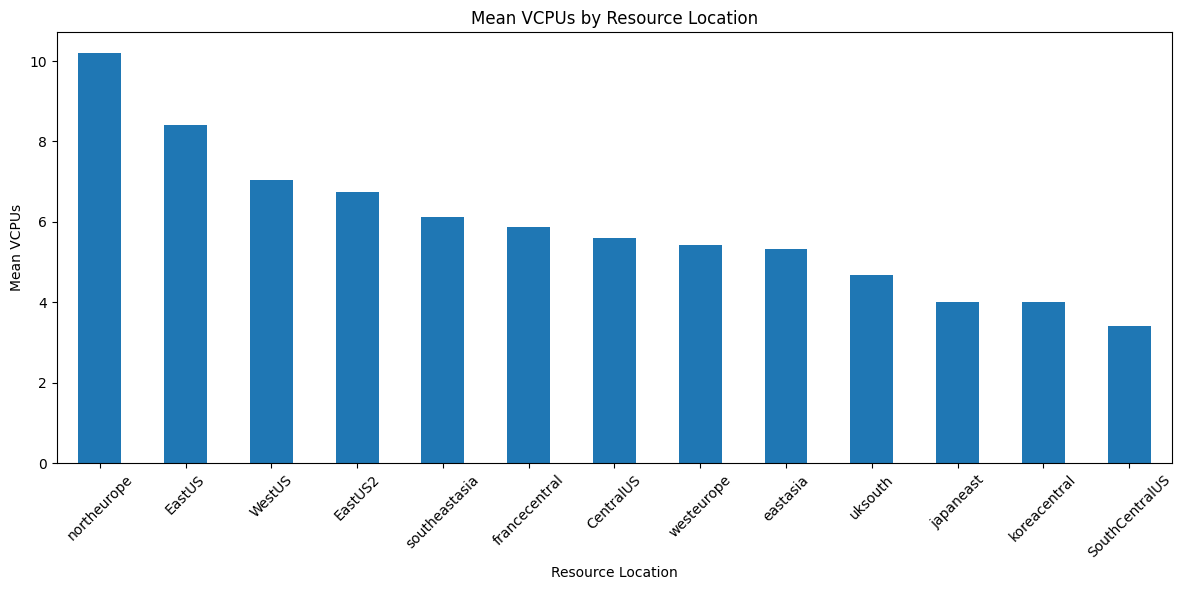

In [44]:
# Geographical Analysis
location_cost = df.groupby('ResourceLocation')['VCPUs'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
location_cost.plot(kind='bar')
plt.title('Mean VCPUs by Resource Location')
plt.xlabel('Resource Location')
plt.ylabel('Mean VCPUs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

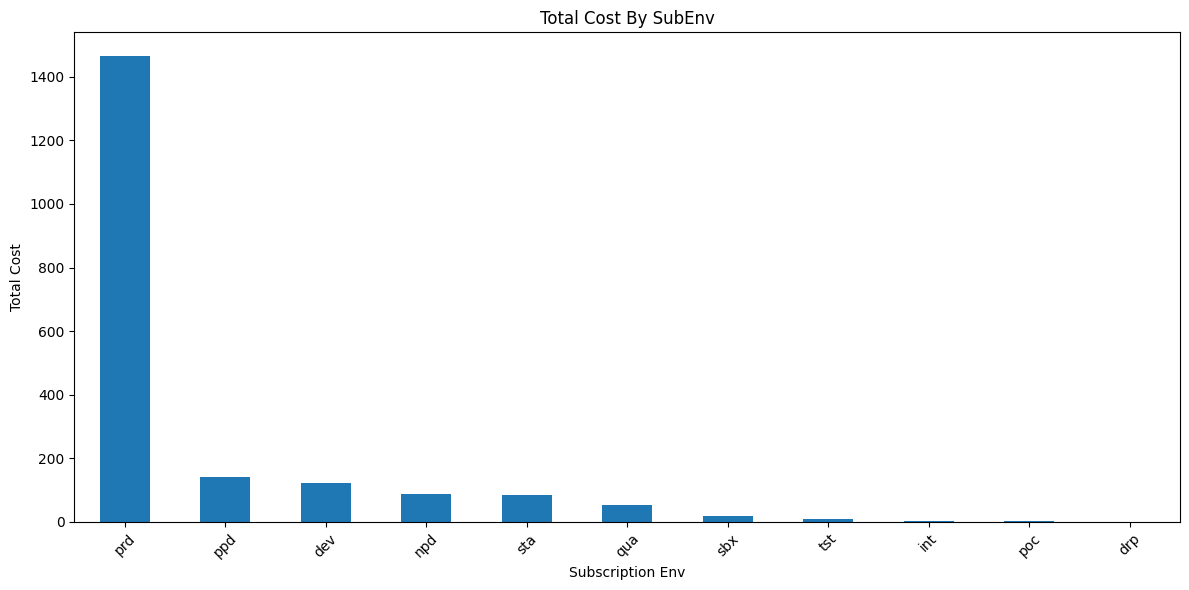

In [45]:
# Geographical Analysis
location_cost = df.groupby('SubscriptionEnv')['Cost'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
location_cost.plot(kind='bar')
plt.title('Total Cost By SubEnv')
plt.xlabel('Subscription Env')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
df["VCPUs"] = df["VCPUs"].astype("int")


C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\2547024764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["VCPUs"] = df["VCPUs"].astype("int")


In [47]:
df["VCPUs"].unique()

# QUELLES SONT LES VM QUI ONT LES MEME VCPU ?

array([ 4, 16,  2,  8,  1, 32, 12, 20, 64, 36, 48])

In [48]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame

# First, let's group by MeterName and VCPU
grouped = df.groupby(['MeterName', 'VCPUs']).size().reset_index(name='count')

# Create a color mapping for unique VCPU values
unique_vcpus = grouped['VCPUs'].unique()
color_map = {vcpu: px.colors.qualitative.Plotly[i % len(px.colors.qualitative.Plotly)] 
             for i, vcpu in enumerate(unique_vcpus)}

# Create an interactive scatter plot
fig = go.Figure()

for vcpu in unique_vcpus:
    vcpu_data = grouped[grouped['VCPUs'] == vcpu]
    fig.add_trace(go.Scatter(
        x=vcpu_data['MeterName'],
        y=vcpu_data['count'],
        mode='markers',
        marker=dict(size=10, color=color_map[vcpu]),
        name=f'VCPU: {vcpu}',
        text=vcpu_data['MeterName'],  # This will show up in the hover text
        hovertemplate='MeterName: %{text}<br>Count: %{y}<br>VCPU: ' + str(vcpu)
    ))

fig.update_layout(
    title='MeterNames grouped by VCPU',
    xaxis_title='MeterName',
    yaxis_title='Count',
    xaxis_tickangle=-45,
    showlegend=True
)

# Show the plot
fig.show()

# Print MeterNames with the same VCPU
for vcpu in unique_vcpus:
    meter_names = grouped[grouped['VCPUs'] == vcpu]['MeterName'].tolist()
    print(f"\nVCPU: {vcpu}")
    print("MeterNames:", ', '.join(meter_names))

# Additional analysis: Find MeterNames with multiple VCPU values
multi_vcpu_meters = grouped.groupby('MeterName').filter(lambda x: len(x['VCPUs'].unique()) > 1)
if not multi_vcpu_meters.empty:
    print("\nMeterNames with multiple VCPU values:")
    for meter in multi_vcpu_meters['MeterName'].unique():
        vcpus = multi_vcpu_meters[multi_vcpu_meters['MeterName'] == meter]['VCPUs'].tolist()
        print(f"{meter}: {', '.join(map(str, vcpus))}")
else:
    print("\nNo MeterNames found with multiple VCPU values.")


VCPU: 2
MeterNames: A2 v2, B2as v2, B2ms, B2s, D11 v2/DS11 v2, D2 v2/DS2 v2, D2 v2/DS2 v2 - Expired, D2 v3/D2s v3, D2 v4, D2 v5, D2a v4/D2as v4, D2ads v5, D2as v5, D2ds v4, D2ds v5, D2lds v5, D2s v4, D2s v5, E2 v3/E2s v3, E2a v4/E2as v4, E2ads v5, E2bds v5, E2bs v5, E2ds v5, E2s v5, E4-2ads v5, E4-2ds v4, E4ds v5, F2/F2s, F2s v2

VCPU: 4
MeterNames: A4 v2, A4m v2, B4as v2, B4ms, D12 v2/DS12 v2, D13 v2/DS13 v2, D3 v2/DS3 v2, D4 v3/D4s v3, D4 v4, D4 v5, D4a v4/D4as v4, D4ads v5, D4ads v5 Spot, D4as v5, D4as v5 Spot, D4d v4, D4ds v4, D4ds v5, D4lds v5, D4ls v5, D4s v4, D4s v5, DC4s v2, DS12 v2 Spot, E4 v3/E4s v3, E4 v4, E4a v4/E4as v4, E4ads v5, E4ads v5 Spot, E4as v4 Spot, E4as v5, E4bds v5, E4ds v5, E4s v4, E4s v5, E8 v3/E8s v3, E8-4ads v5, E8-4ds v4, E8ds v5, F4/F4s, F4s Spot, F4s v2

VCPU: 8
MeterNames: A8 v2, A8m v2, B8ms, D13 v2/DS13 v2, D13 v2/DS13 v2 Spot, D4 v2/DS4 v2, D4 v2/DS4 v2 Spot, D8 v3/D8s v3, D8 v5, D8a v4/D8as v4, D8a v4/D8as v4 Spot, D8ads v5, D8ads v5 Spot, D8as v5, 

### Clustering VM and VCPUs together

In [49]:
df.dtypes

MeterName            object
MeterCategory        object
InvoiceSection       object
MeterSubCategory     object
ResourceLocation     object
Quantity            float64
EffectivePrice      float64
UnitPrice           float64
Cost                float64
AdditionalInfo       object
UnitOfMeasure        object
ProductOrderName     object
PlanName             object
PayGPrice           float64
SubscriptionEnv      object
ResourceGroupEnv     object
ConsumedQty         float64
VCPUs                 int32
dtype: object

In [50]:
df["ConsumedQty"]

0       0.316673
1       0.316673
2       1.000000
4       1.000000
5       0.633346
          ...   
7289    1.000000
7290    0.450009
7291    0.233338
7292    0.233338
7293    0.333340
Name: ConsumedQty, Length: 2968, dtype: float64

In [51]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming your data is in a DataFrame called 'df'

# Define categorical and numerical columns
categorical_columns = ['VCPUs', 'InvoiceSection']
numerical_columns = ['Quantity', 'Cost', 'ConsumedQty']

# Create preprocessing steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [52]:
# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA()),  # Keep 95% of variance
    ('kmeans', KMeans(n_clusters=5, random_state=42))  # Adjust n_clusters as needed
])

# Fit the pipeline and predict clusters
clusters = pipeline.fit_predict(df)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Group by MeterSubCategory and Cluster to see the distribution
result = df.groupby(["InvoiceSection", "MeterSubCategory"]).size().unstack(fill_value=0)
print(result)

MeterSubCategory  Av2 Series  BS Series  BS Series Windows  Basv2 Series  \
InvoiceSection                                                             
SECTION 1                  0          4                  0             0   
SECTION 10                 0          0                  0             0   
SECTION 11                 0          3                  0             0   
SECTION 12                 0          1                  0             0   
SECTION 14                 0          0                  0             0   
SECTION 15                 5          0                  0             0   
SECTION 16                 0          0                  0             0   
SECTION 17                 0          8                  0             0   
SECTION 18                 0          1                  0             0   
SECTION 19                 0          2                  0             0   
SECTION 2                  0          0                  0             0   
SECTION 20  

C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\248270336.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\265782951.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\265782951.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



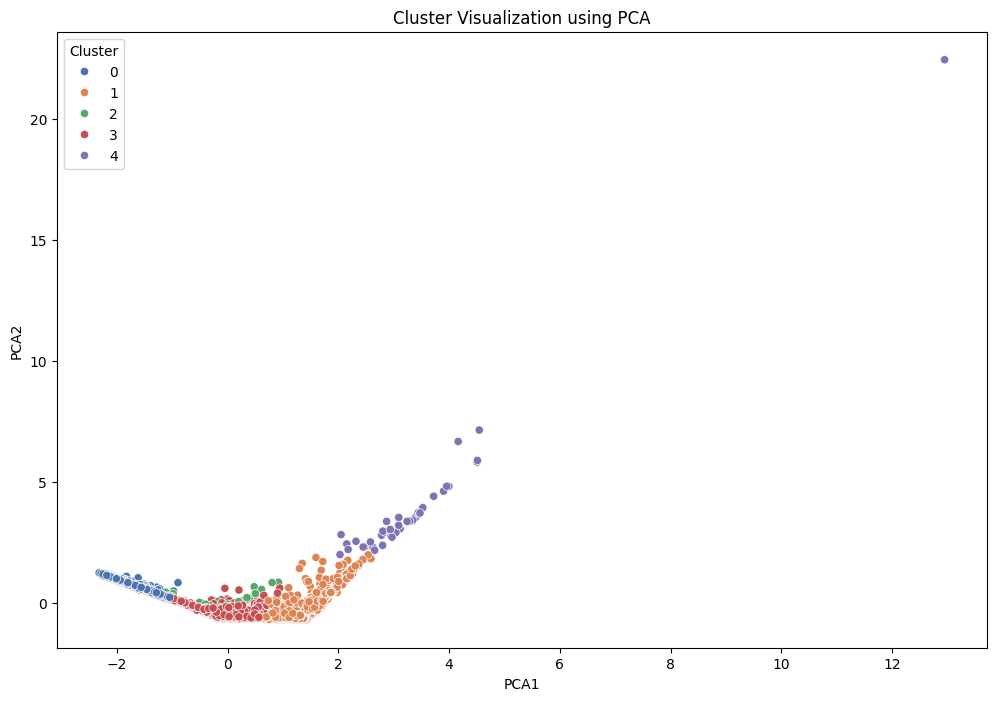

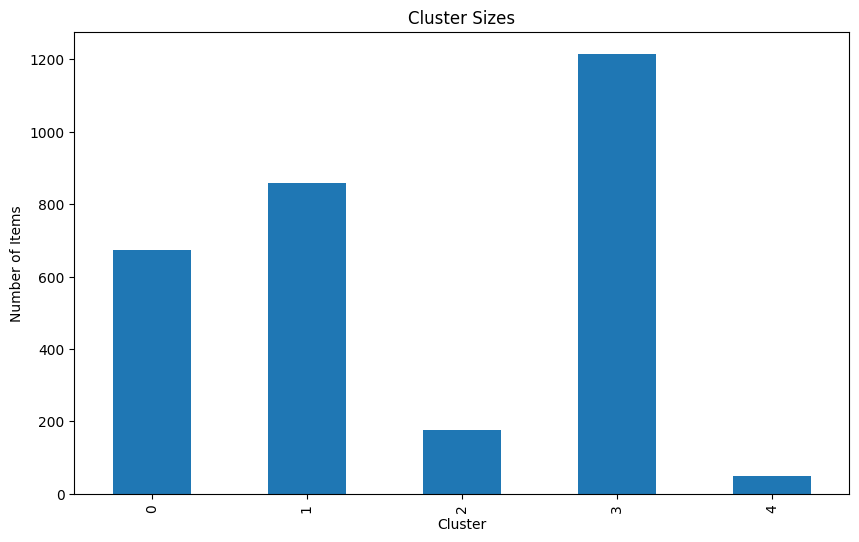

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Assume 'df' is your DataFrame with the 'Cluster' column added
# and 'pipeline' is your fitted pipeline object

# 1. PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(pipeline.named_steps['preprocessor'].transform(df))
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# 2. Scatter plot of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='deep', legend='full')
plt.title('Cluster Visualization using PCA')
plt.show()

# 3. Bar plot of cluster sizes
plt.figure(figsize=(10, 6))
df['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Items')
plt.show()


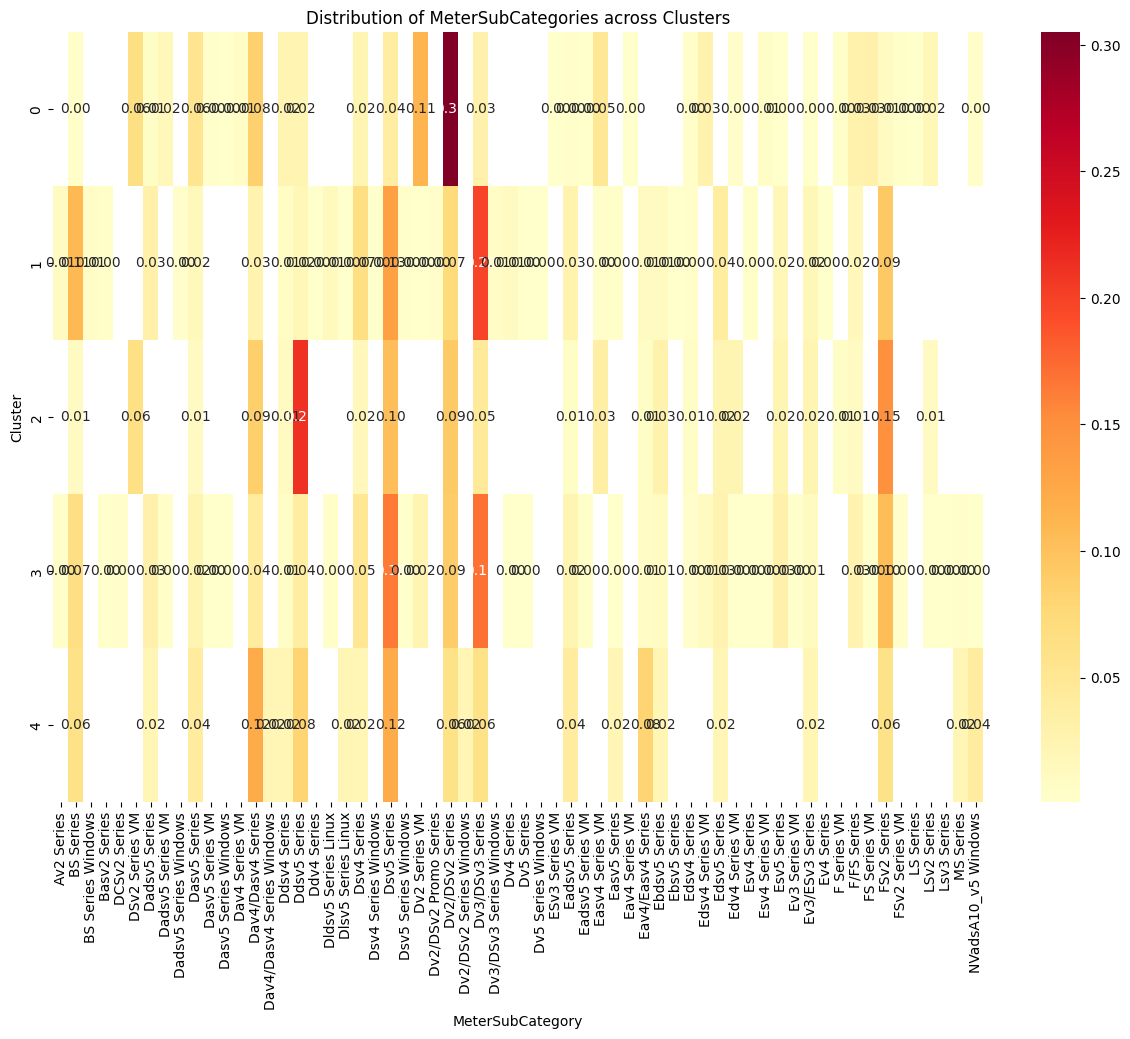

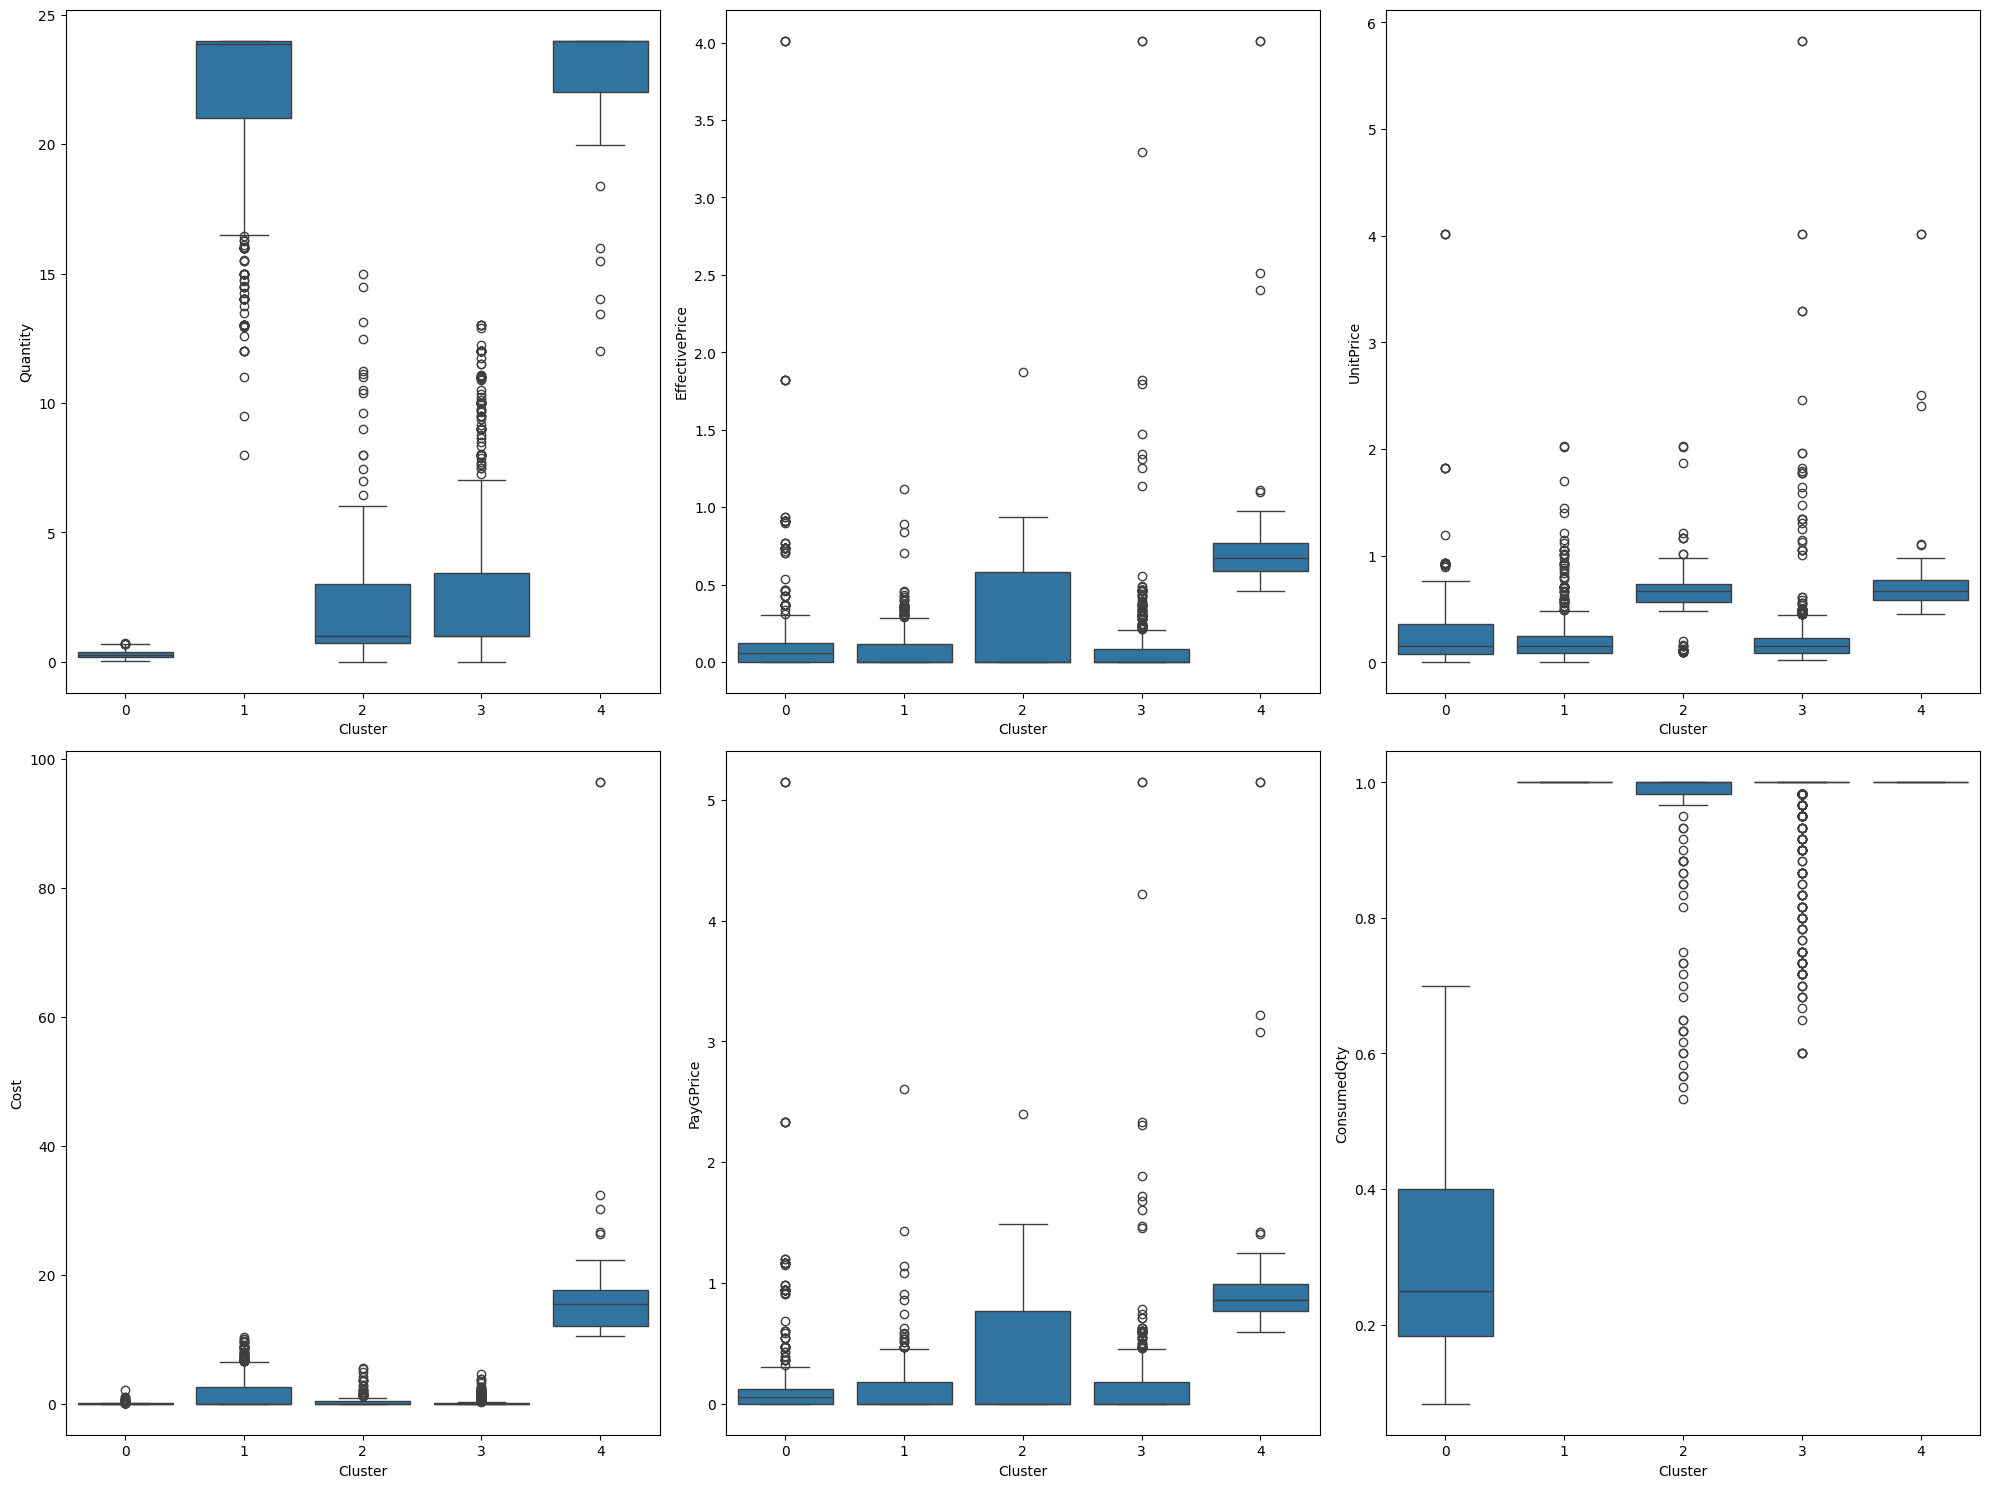

In [54]:

# 5. Distribution of MeterSubCategories across clusters
subcategory_cluster = df.groupby('Cluster')['MeterSubCategory'].value_counts(normalize=True).unstack()
plt.figure(figsize=(15, 10))
sns.heatmap(subcategory_cluster, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Distribution of MeterSubCategories across Clusters')
plt.show()

# 6. Box plots for numerical features
numerical_columns = ['Quantity', 'EffectivePrice', 'UnitPrice', 'Cost', 'PayGPrice', 'ConsumedQty']
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, x='Cluster', y=col, ax=axes[i//3, i%3])
plt.tight_layout()
plt.show()

In [55]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

# Assume 'df' is your DataFrame with the 'Cluster' column added
# and 'pipeline' is your fitted pipeline object

# PCA for visualization (now with 3 components)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pipeline.named_steps['preprocessor'].transform(df))
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3',
                    color='Cluster',
                    hover_data=['MeterSubCategory', 'MeterCategory', 'ResourceLocation', 'ConsumedQty','VCPUs'],
                    labels={'PCA1': 'PC 1', 'PCA2': 'PC 2', 'PCA3': 'PC 3'},
                    title='Interactive 3D Cluster Visualization')

# Update the layout for a cleaner look
fig.update_layout(legend_title_text='Cluster')

# Show the plot
fig.show()

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", sum(pca.explained_variance_ratio_))

# Create 2D interactive plots for each pair of principal components
fig_2d = px.scatter(df, x='PCA1', y='PCA2', color='Cluster',
                    hover_data=['MeterSubCategory', 'MeterCategory', 'ResourceLocation','ConsumedQty','VCPUs', 'InvoiceSection'],
                    title='PCA1 vs PCA2')
fig_2d.show()

fig_2d = px.scatter(df, x='PCA1', y='PCA3', color='Cluster',
                    hover_data=['MeterSubCategory', 'MeterCategory', 'ResourceLocation','ConsumedQty','VCPUs', 'InvoiceSection'],
                    title='PCA1 vs PCA3')
fig_2d.show()

fig_2d = px.scatter(df, x='PCA2', y='PCA3', color='Cluster',
                    hover_data=['MeterSubCategory', 'MeterCategory', 'ResourceLocation','ConsumedQty','VCPUs', 'InvoiceSection'],
                    title='PCA2 vs PCA3')
fig_2d.show()

C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\3802170046.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\3802170046.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\3802170046.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

Explained variance ratio: [0.36551717 0.1996303  0.11215316]
Cumulative explained variance ratio: 0.67730062195065


In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA

# Assume 'df' is your DataFrame with the 'Cluster' column added
# and 'pipeline' is your fitted pipeline object

# Get feature names after preprocessing
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# PCA for visualization (now with 3 components)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(pipeline.named_steps['preprocessor'].transform(df))
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]

# Create an interactive 3D scatter plot
fig_3d = px.scatter_3d(df, x='PCA1', y='PCA2', z='PCA3',
                    color='Cluster',
                    hover_data=['MeterSubCategory', 'MeterCategory', 'ResourceLocation'],
                    labels={'PCA1': 'PC 1', 'PCA2': 'PC 2', 'PCA3': 'PC 3'},
                    title='Interactive 3D Cluster Visualization')

# Update the layout for a cleaner look
fig_3d.update_layout(legend_title_text='Cluster')

# Show the 3D plot
fig_3d.show()

# Print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance ratio:", sum(pca.explained_variance_ratio_))

# Create a subplot with 3 bar charts for feature importance
fig = make_subplots(rows=1, cols=3, subplot_titles=("PC1 Feature Importance", "PC2 Feature Importance", "PC3 Feature Importance"))

for i in range(3):
    # Get the absolute values of the PCA components
    pca_components = np.abs(pca.components_[i])
    
    # Sort features by importance
    sorted_idx = pca_components.argsort()
    
    # Get top 20 features (or less if there are fewer features)
    top_n = min(20, len(feature_names))
    top_features = sorted_idx[-top_n:]

    fig.add_trace(
        go.Bar(y=[feature_names[j] for j in top_features], 
               x=pca_components[top_features], 
               orientation='h',
               name=f'PC{i+1}'),
        row=1, col=i+1
    )

fig.update_layout(height=600, width=1200, title_text="Feature Importance in Principal Components")
fig.show()

# Create 2D interactive plots for each pair of principal components
fig_2d_12 = px.scatter(df, x='PCA1', y='PCA2', color='Cluster',
                    hover_data=['MeterSubCategory', 'MeterCategory', 'ResourceLocation'],
                    title='PCA1 vs PCA2')
fig_2d_12.show()

fig_2d_13 = px.scatter(df, x='PCA1', y='PCA3', color='Cluster',
                    hover_data=['MeterSubCategory', 'MeterCategory', 'ResourceLocation'],
                    title='PCA1 vs PCA3')
fig_2d_13.show()

fig_2d_23 = px.scatter(df, x='PCA2', y='PCA3', color='Cluster',
                    hover_data=['MeterSubCategory', 'MeterCategory', 'ResourceLocation'],
                    title='PCA2 vs PCA3')
fig_2d_23.show()

C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\936777918.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\936777918.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Pierre LAGUE\AppData\Local\Temp\ipykernel_2356\936777918.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

Explained variance ratio: [0.36551717 0.1996303  0.11215316]
Cumulative explained variance ratio: 0.6773006219506499


## Focus on vCore 

In [18]:
#vCore = base de données
azure_bill = pd.read_csv(r"C:\Users\Pierre LAGUE\Documents\SUDO\scripts\CLOUD_PROVIDER_BILL\data\azure_sample_10000.csv")
len(azure_bill[azure_bill["MeterName"]=='vCore'])
azure_vcore = azure_bill[azure_bill["MeterName"]=='vCore']
azure_bill.columns

Index(['BillingAccountId', 'BillingAccountName', 'BillingPeriodStartDate',
       'BillingPeriodEndDate', 'BillingProfileId', 'BillingProfileName',
       'AccountOwnerId', 'AccountName', 'SubscriptionId', 'SubscriptionName',
       '_Date', 'Product', 'PartNumber', 'MeterId', 'ServiceFamily',
       'MeterCategory', 'MeterSubCategory', 'MeterRegion', 'MeterName',
       'Quantity', 'EffectivePrice', 'Cost', 'UnitPrice', 'BillingCurrency',
       'ResourceLocation', 'AvailabilityZone', 'ConsumedService', 'ResourceId',
       'ResourceName', 'ServiceInfo1', 'ServiceInfo2', 'AdditionalInfo',
       'Tags', 'InvoiceSectionId', 'InvoiceSection', 'CostCenter',
       'UnitOfMeasure', 'ResourceGroup', 'ReservationId', 'ReservationName',
       'ProductOrderId', 'ProductOrderName', 'OfferId',
       'IsAzureCreditEligible', 'Term', 'PublisherName', 'PlanName',
       'ChargeType', 'Frequency', 'PublisherType', 'PayGPrice', 'PricingModel',
       'CostAllocationRuleName', 'benefitId', 'benefit

120 lignes détecter les colonnes le splus pertinentes -> colonnes pertinentes

In [19]:
print(azure_vcore.columns)

Index(['BillingAccountId', 'BillingAccountName', 'BillingPeriodStartDate',
       'BillingPeriodEndDate', 'BillingProfileId', 'BillingProfileName',
       'AccountOwnerId', 'AccountName', 'SubscriptionId', 'SubscriptionName',
       '_Date', 'Product', 'PartNumber', 'MeterId', 'ServiceFamily',
       'MeterCategory', 'MeterSubCategory', 'MeterRegion', 'MeterName',
       'Quantity', 'EffectivePrice', 'Cost', 'UnitPrice', 'BillingCurrency',
       'ResourceLocation', 'AvailabilityZone', 'ConsumedService', 'ResourceId',
       'ResourceName', 'ServiceInfo1', 'ServiceInfo2', 'AdditionalInfo',
       'Tags', 'InvoiceSectionId', 'InvoiceSection', 'CostCenter',
       'UnitOfMeasure', 'ResourceGroup', 'ReservationId', 'ReservationName',
       'ProductOrderId', 'ProductOrderName', 'OfferId',
       'IsAzureCreditEligible', 'Term', 'PublisherName', 'PlanName',
       'ChargeType', 'Frequency', 'PublisherType', 'PayGPrice', 'PricingModel',
       'CostAllocationRuleName', 'benefitId', 'benefit

> We're going to use the following columns for vCore analysis
- ConsumedService : name of the service (if we're only focusing on vCore it might not be important but when we generalize the analysis, this will be insightful)
- UnitOfMeasure : unit of measure for billing the service can help scale the prediction of the price
- ReservationId : identifier for plotting not a feature in itself
- PlanName : planName on the marketplace, useful for post inference analysis and correlation
- PricingModel : will bring insight post inference analysis
- BillingPeriodStartDate : time index for time seris modelling
- BillingPeriodEndDate : idem 
- Cost : our target for cost prediction (regression)
- EffectivePrice : feature used to create the Effective Cost. EfectivePrice multiplied by quantity gives you the effective cost (cost after discounts linked to plans etc).
- UnitPrice : unit price of the service per unit of measure
- MeterId : identifier for the resource
- PayGPrice : pay as you go price. if fixed for each resource
- ResourceLocation : geographical location of the resource when it's being used (useful for green it)
- Quantity : used to create the effective cost column. Can be a target for regression/prediction as well depending on the problem
- ChargeType : usage, purchase or refund can be insightful for later analysis.

In [20]:
print()

In [21]:
azure_vcore = azure_vcore[["BillingPeriodStartDate", "Cost", "EffectivePrice", "UnitPrice", "ResourceGroup", "Quantity", "MeterCategory"]]

In [22]:
azure_vcore = azure_vcore.sort_values(by=["BillingPeriodStartDate"])

In [23]:
azure_vcore["ResourceGroup"].value_counts()

ResourceGroup
sep-eus1-prod-db-mysql-rg               7
sep-wus1-prod-db-mysql-rg               5
AUSE2-DEV-SQL-SERVICES-RG               5
sep-eus1-lower-db-mysql-rg              5
AEUW-ISA-PROD-SHARED-SQL-SERVICES-RG    3
                                       ..
rsg-hr-wordpress-stg                    1
app-hublot-prod-rg                      1
AUE2-SCCS-DEV-SQL-VERTEX-RG             1
AUE2-DEV-SQL-SOLARWINDS-RG              1
AUE2-SCCS-QA-SQL-EAC-RG                 1
Name: count, Length: 78, dtype: int64

In [24]:
def convert_to_datetime(df, label):
    # Convert date strings to datetime
    df.loc[df.index, label] = (pd.to_datetime(df[label], format='%m/%d/%Y'))
    print(df[label].dtype)
    df['timestamp'] = df[label].apply(lambda x: x.timestamp())

    return df

azure_vcore = convert_to_datetime(azure_vcore, "BillingPeriodStartDate")

object


In [25]:
resource_grp = azure_vcore["ResourceGroup"]
dummies = pd.get_dummies(azure_vcore['ResourceGroup'], prefix='category')

azure_vcore = pd.concat([azure_vcore, dummies, resource_grp], axis=1)
azure_vcore


BillingPeriodStartDate       Cost  EffectivePrice  UnitPrice  \
4181    2024-01-01 00:00:00   7.305600        0.076100   0.076100   
4111    2024-01-01 00:00:00   5.292000        0.220500   0.220500   
4112    2024-01-01 00:00:00   0.000000        0.000000   0.092000   
4182    2024-01-01 00:00:00   2.385600        0.049700   0.049700   
4115    2024-01-01 00:00:00   0.000000        0.000000   0.000000   
...                     ...        ...             ...        ...   
4150    2024-03-01 00:00:00  14.592000        0.076000   0.076000   
4155    2024-03-01 00:00:00   3.994873        0.380947   0.380947   
4157    2024-03-01 00:00:00  13.248000        0.138000   0.138000   
4164    2024-03-01 00:00:00   0.000000        0.000000   0.000000   
4198    2024-03-01 00:00:00   5.856000        0.122000   0.122000   

                         ResourceGroup   Quantity  \
4181              lv-rg-prd-knowdecide   96.00000   
4111           lv-rg-prp-hrdataquality   24.00000   
4112         sep-eus1-prod-db-mysql-rg  172.00000   
4182                    NEW-ECO-DEVOPS   48.00000   
4115  HLD-DATALAKEAGACHE-INT-01-RGROUP   48.00000   
...                                ...        ...   
4150                  cha-rg-we-ecom-p  192.00000   
4155        AUE2-STAGE-SQL-SERVICES-RG   10.48669   
4157           HLD-ATLAS-DEV-01-RGROUP   96.00000   
4164           AUE2-SCCS-QA-SQL-EAC-RG  192.00000   
4198                    euwfizz-prd-rg   48.00000   

                      MeterCategory     timestamp  \
4181     Azure Database for MariaDB  1.704067e+09   
4111  Azure Database for PostgreSQL  1.704067e+09   
4112       Azure Database for MySQL  1.704067e+09   
4182                   SQL Database  1.704067e+09   
4115           SQL Managed Instance  1.704067e+09   
...                             ...           ...   
4150       Azure Database for MySQL  1.709251e+09   
4155                   SQL Database  1.709251e+09   
4157                   SQL Database  1.709251e+09   
4164           SQL Managed Instance  1.709251e+09   
4198                   SQL Database  1.709251e+09   

      category_AASS-ISA-QA-SHARED-SQL-SERVICES-RG  category_ADFPOC  ...  \
4181                                        False            False  ...   
4111                                        False            False  ...   
4112                                        False            False  ...   
4182                                        False            False  ...   
4115                                        False            False  ...   
...                                           ...              ...  ...   
4150                                        False            False  ...   
4155                                        False            False  ...   
4157                                        False            False  ...   
4164                                        False            False  ...   
4198                                        False            False  ...   

      category_rsg-hr-wordpress-stg  category_rsg-sde-data-prod-001  \
4181                          False                           False   
4111                          False                           False   
4112                          False                           False   
4182                          False                           False   
4115                          False                           False   
...                             ...                             ...   
4150                          False                           False   
4155                          False                           False   
4157                          False                           False   
4164                          False                           False   
4198                          False                           False   

      category_sep-eus1-lower-db-mysql-rg  \
4181                                False   
4111                                False   
4112         

In [26]:
y = azure_vcore["Quantity"]
X = azure_vcore.drop(["Quantity","BillingPeriodStartDate", "ResourceGroup"], axis=1)

In [27]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
    y, train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

In [29]:
tpot.fit(X_train, y_train)

                                                                              
Generation 1 - Current best internal CV score: -inf


c:\Users\Pierre LAGUE\Documents\SUDO\.venv\Lib\site-packages\tpot\base.py:1164: SyntaxWarning: invalid escape sequence '\w'
  (m.start(), m.end()) for m in re.finditer(", [\w]+__", dirty_string)


ValueError: could not convert string to float: 'SQL Managed Instance'

In [177]:
print(tpot.score(X_test, y_test))
pred=  tpot.predict(X_test)

-1576.3980273896987


In [183]:
# Calculate performance metrics for multioutput model
multioutput_mse = mean_squared_error(y_test, pred)
multioutput_mae = mean_absolute_error(y_test, pred)
multioutput_mape = mean_absolute_percentage_error(y_test, pred)
multioutput_r2 = r2_score(y_test, pred)
X_test["predictions"] = pred
X_test["predictions"]

4091     26.277424
4085     55.153614
4115     52.574852
4159     95.955704
4162     99.043747
4120     70.866417
4179     52.047626
4166    192.789688
4185     52.574852
4133    210.662857
4142     52.574852
4197     92.422913
4125     44.423157
4082     41.812141
4080    -13.026739
4083     25.745953
4136     56.284634
4181     98.837517
4163     25.745953
4122     90.358650
4124    197.339172
4192     70.866417
4190     99.043747
4094     65.015274
4105     59.731102
4129    106.184402
4176     98.837517
4149     88.565727
4079     47.665867
4099     86.662643
Name: predictions, dtype: float32

In [181]:
# Print the performance metrics
print("Multioutput Model - Mean Squared Error:", multioutput_mse)
print("Multioutput Model - Mean Absolute Error:", multioutput_mae)
print("Multioutput Model - Mean Absolute Percentage Error:", multioutput_mape)
print("Multioutput Model - R2 Score:", multioutput_r2)

Multioutput Model - Mean Squared Error: 1576.3980273896987
Multioutput Model - Mean Absolute Error: 20.78111522569633
Multioutput Model - Mean Absolute Percentage Error: 1.553183322688856
Multioutput Model - R2 Score: 0.7063034025014476


In [182]:
combined_df = pd.concat([X_train, X_test], ignore_index=True)

# Display the combined DataFrame
print(combined_df)

# Step 2: Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined_df['timestamp'], combined_df['quantity'] if key != 'Predictions' else grp['predicted_quantity'],
            label=key, marker='o')

plt.xlabel('Time')
plt.ylabel('Quantity')
plt.title('Train Set, Test Set, and Predictions Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

       Cost  EffectivePrice  UnitPrice     timestamp  \
0    5.7120          0.1190     0.1190  1.704067e+09   
1    0.2240          0.1120     0.1120  1.709251e+09   
2    0.0000          0.0000     0.0000  1.704067e+09   
3    4.5120          0.0940     0.0940  1.709251e+09   
4    0.0000          0.0000     0.1220  1.706746e+09   
..      ...             ...        ...           ...   
115  8.9376          0.0931     0.0931  1.704067e+09   
116  7.2960          0.0760     0.0760  1.704067e+09   
117  0.0000          0.0000     0.0000  1.709251e+09   
118  0.0000          0.0000     0.0683  1.706746e+09   
119  9.0240          0.0940     0.0940  1.709251e+09   

     category_AASS-ISA-QA-SHARED-SQL-SERVICES-RG  category_ADFPOC  \
0                                          False            False   
1                                          False            False   
2                                          False            False   
3                                          False   

KeyError: 'set'

<Figure size 1200x600 with 0 Axes>